# Exploring Metrics with Grafana

Grafana now has two methods of exploring metrics. **Explore** and explore **Metrics**

## Explore

This page allows you to select a metric name and then add label filters to create a query.

Select the hamburger (three horizontal lines) found in the upper left of the page to expand the menu options. Select **Explore**. This will open the Explore page. Select the **Metrics browser** drop down to activate a list of all of the available metrics. You can also type into the field to search for metric names. Selecting a metric will then show all of the available label names that correspond with the metric.

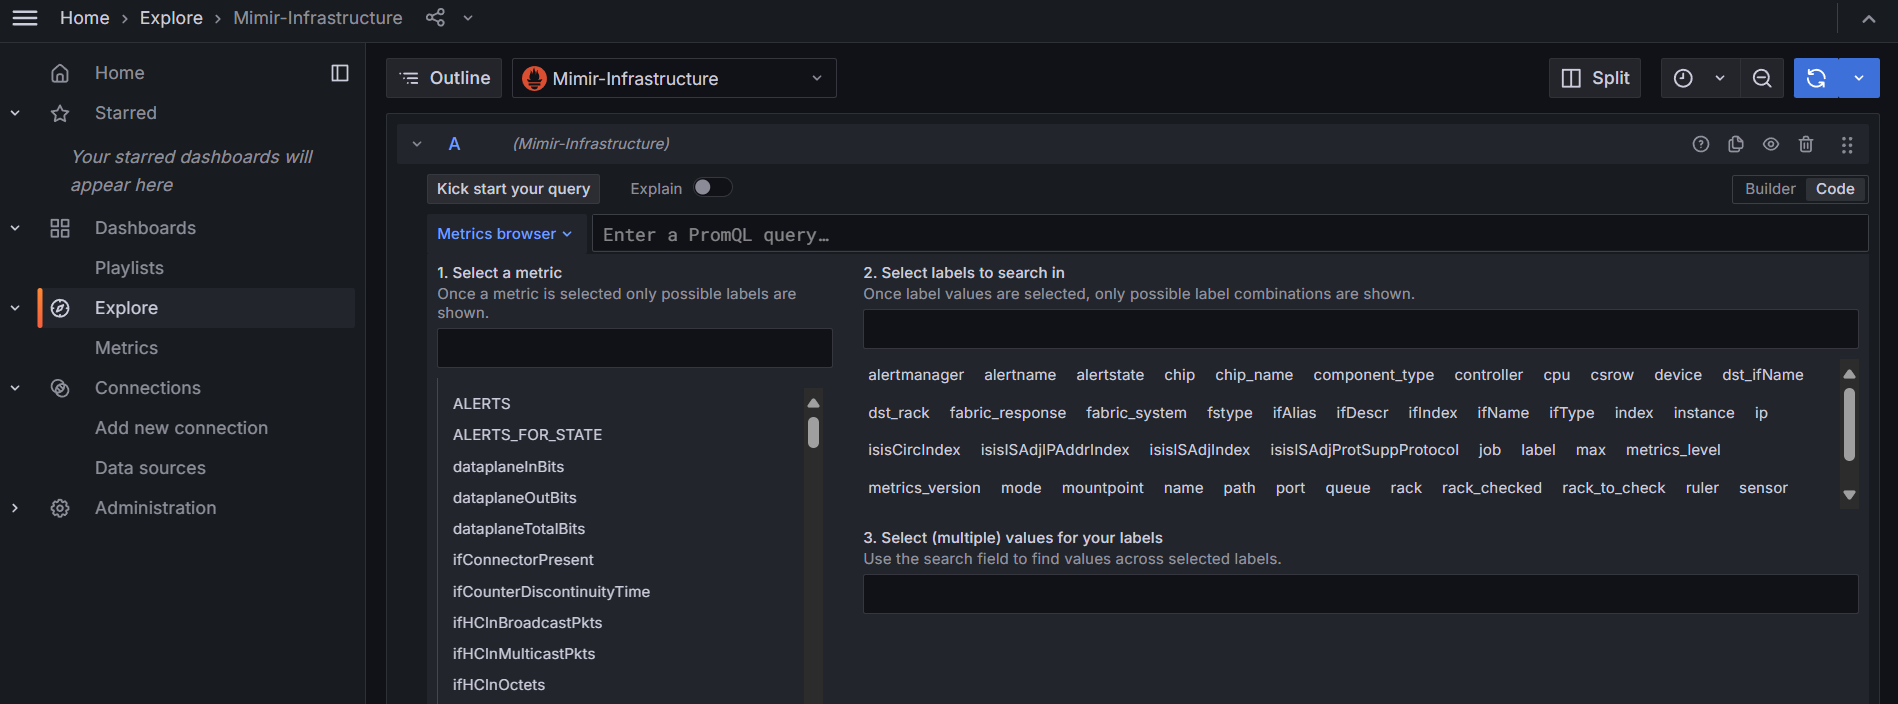

You may select as many labels and values as needed. As you make the selections the resulting query string will appear in the **Resulting selector**. In this example we have choosen the metrics **dataplaneBitsIn** with the label **src_rack** as **atl**.


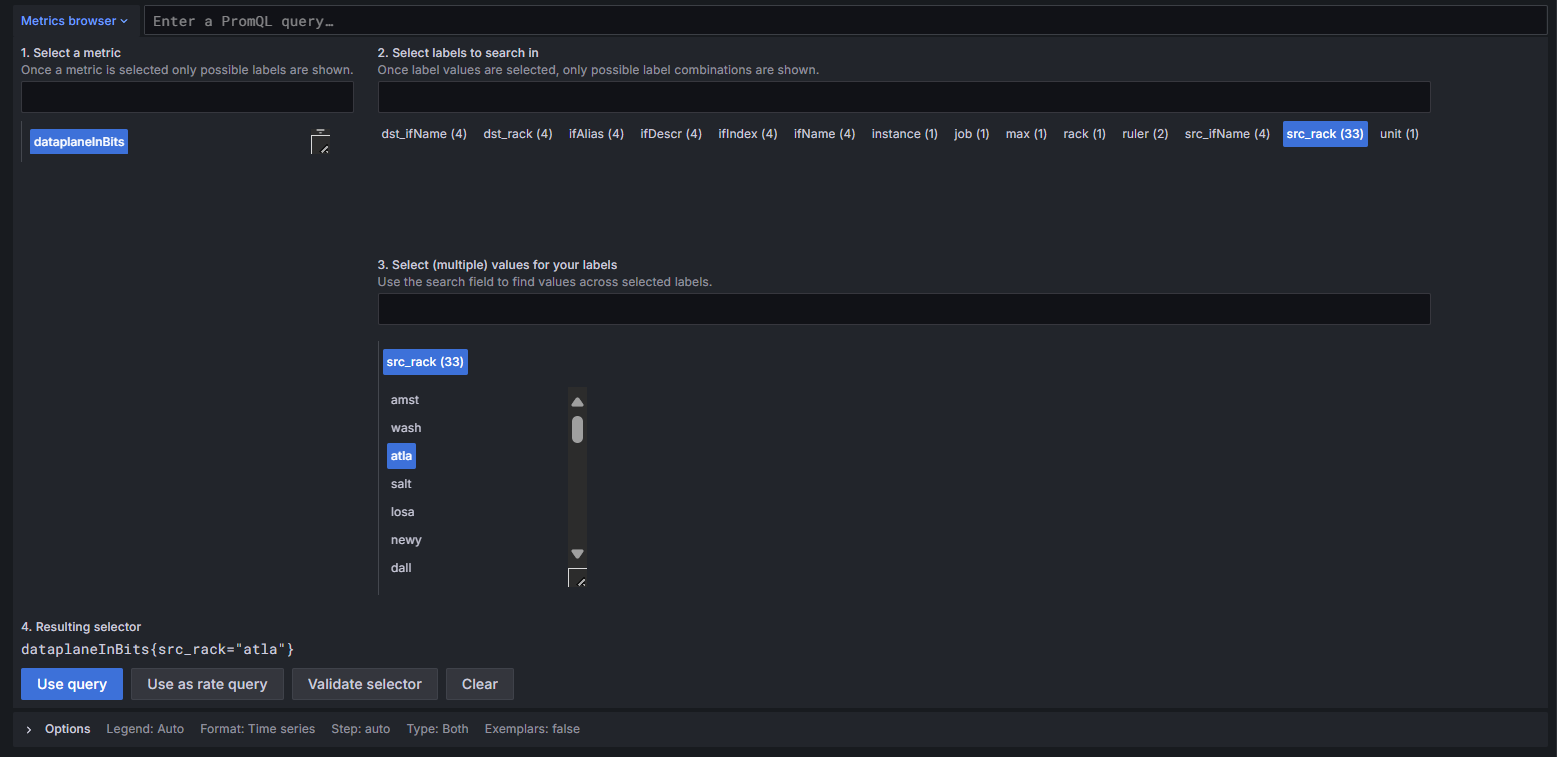

Use the **Query** button to run the query and show the results.

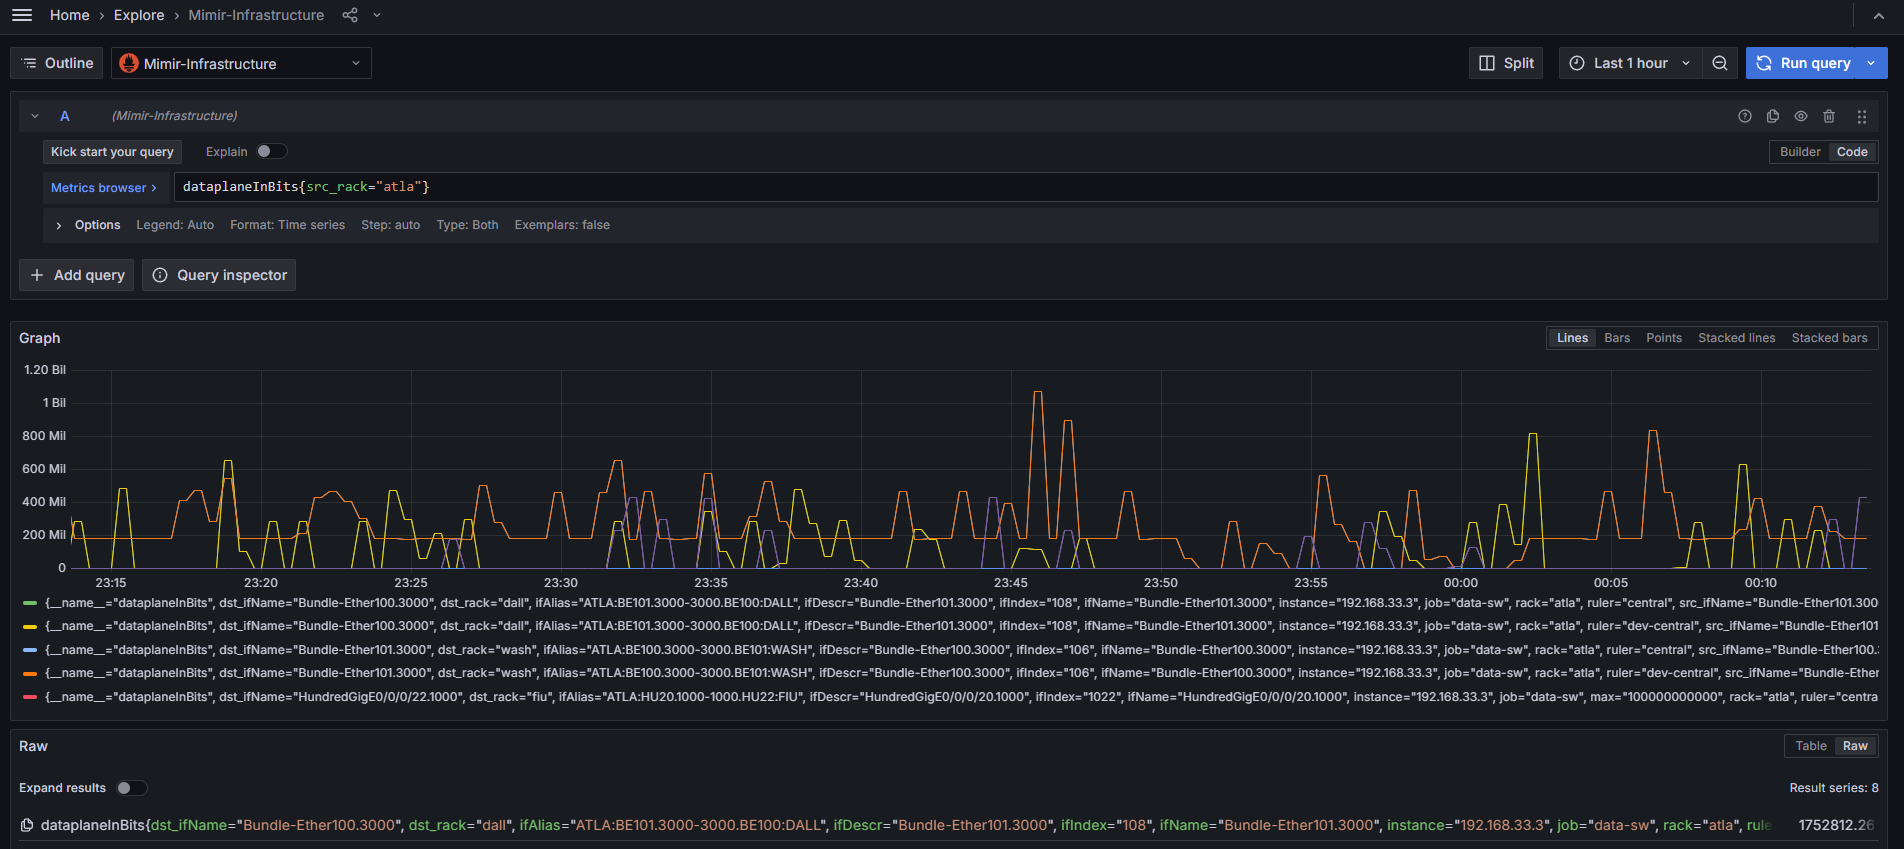

The bottom section will show the **Raw** or **Table** view of the returned results. The Raw view is just the JSON strings consiting of the metric name and its labels plus the value to the right. 

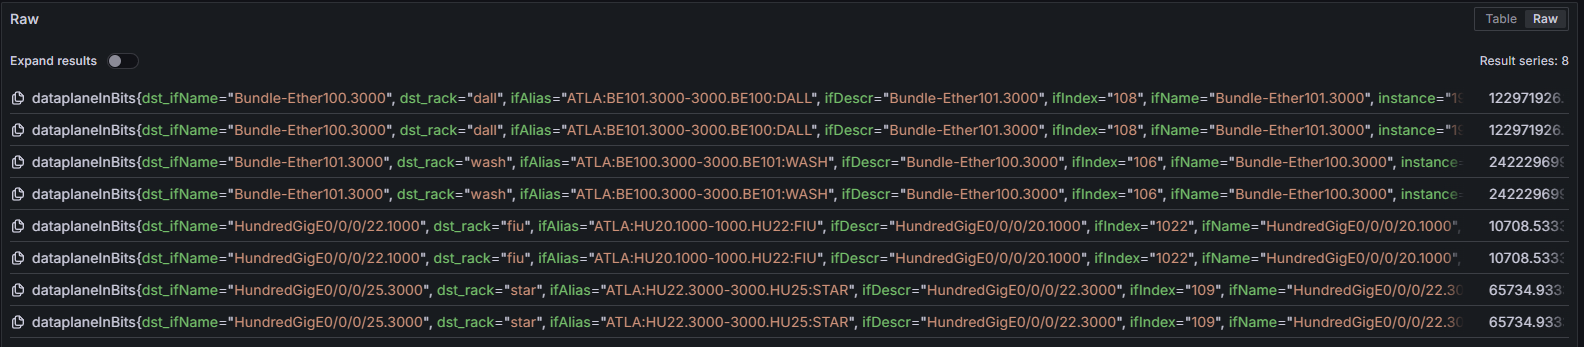

The **Table** view shows a table with sortable columns and controlls to add more filters to the query.

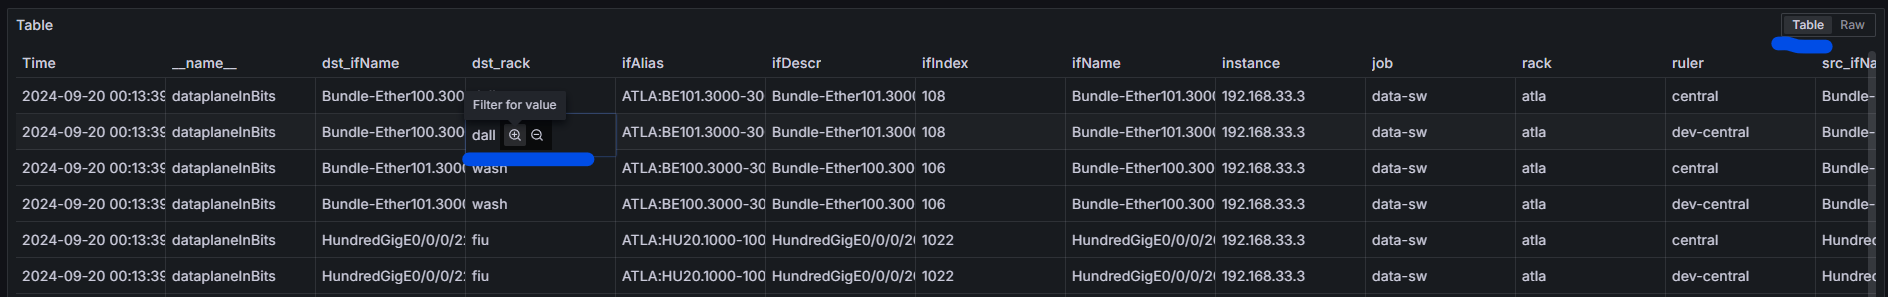

Here the dst_rack = dall filter was added.

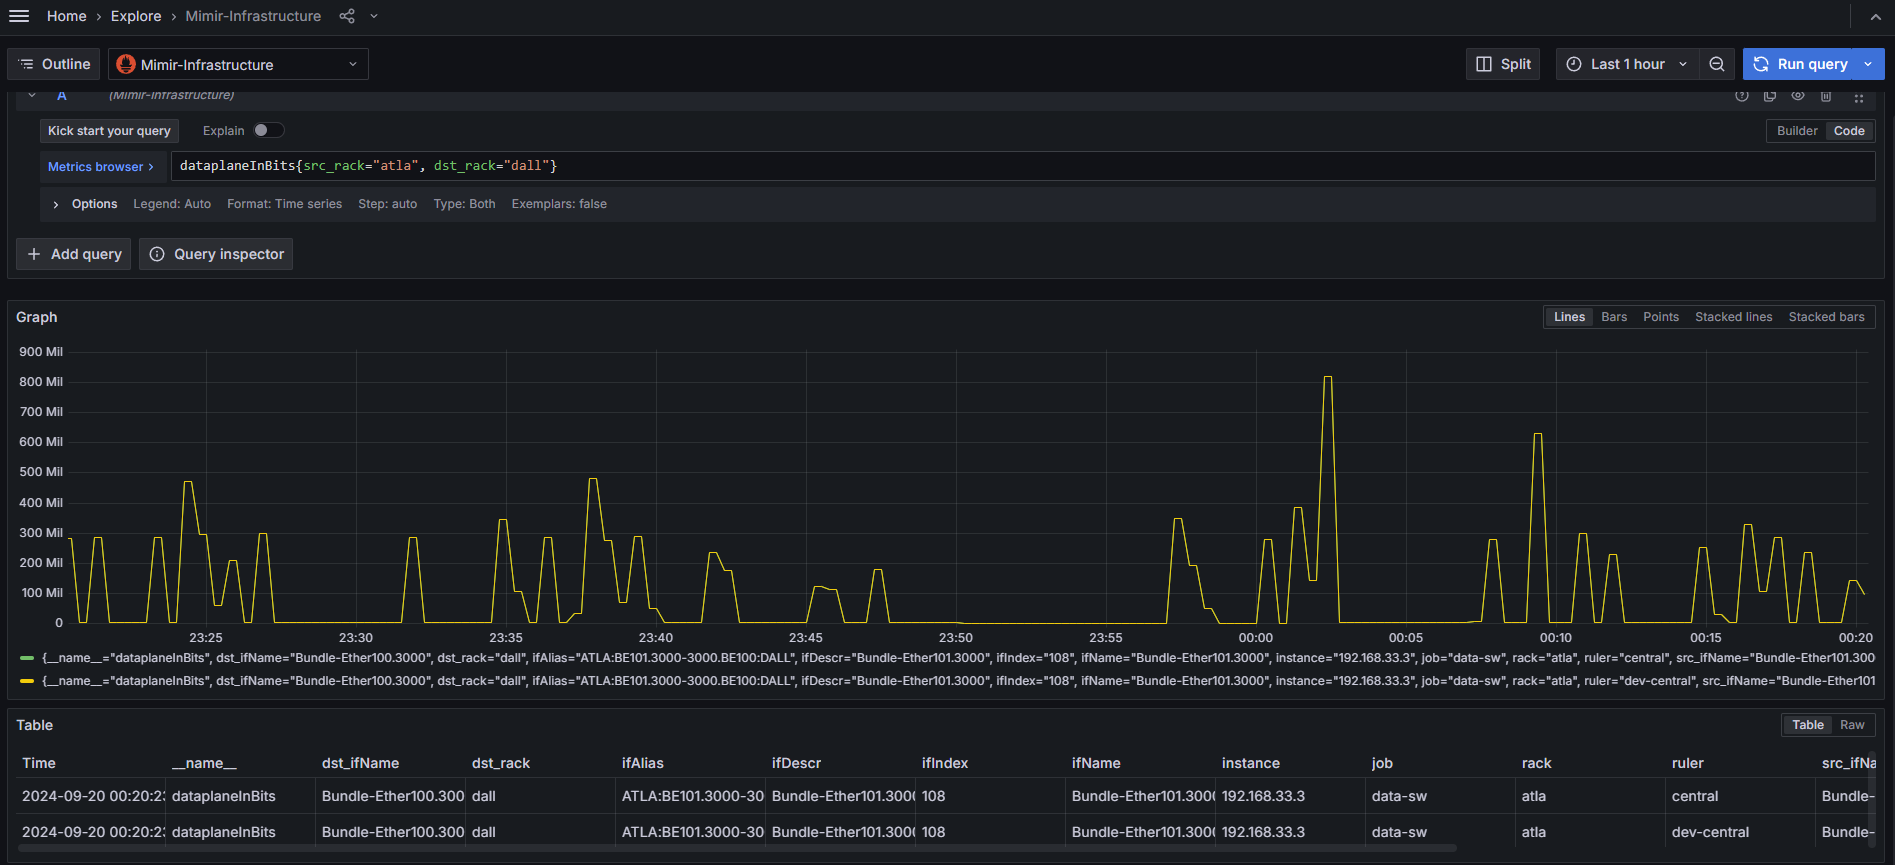

## Metric Explorer

The Metric Explorer is a powerful tool that provides an in depth exploration into a metric, its labels, sample values and related metrics. 

Select the hamburger (three horizontal lines) found in the upper left of the page to expand the menu options. Select **Metrics** under **Explore**. This will open the Metrics Explore page. Click the **New metric exploration** button.


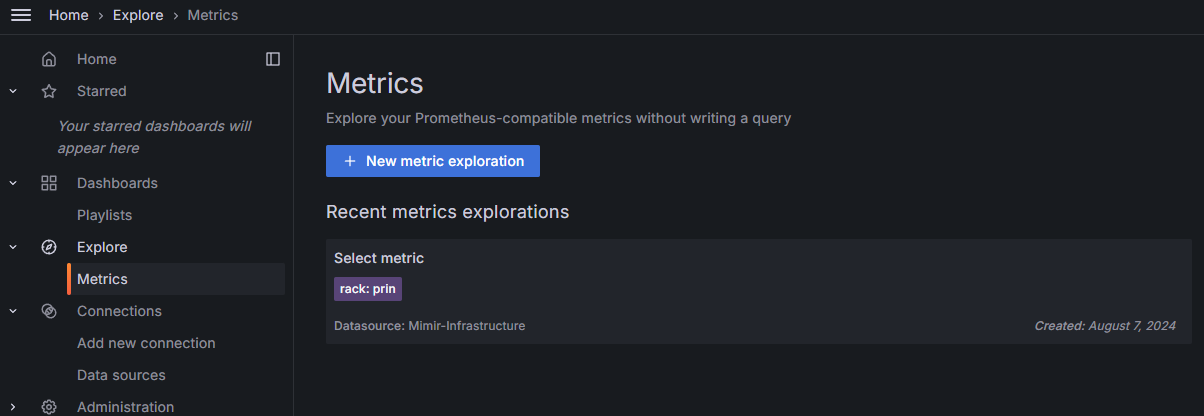


Click **Select** in the upper right hand of a metric you would like to explore. Let's select dataplanInBits.

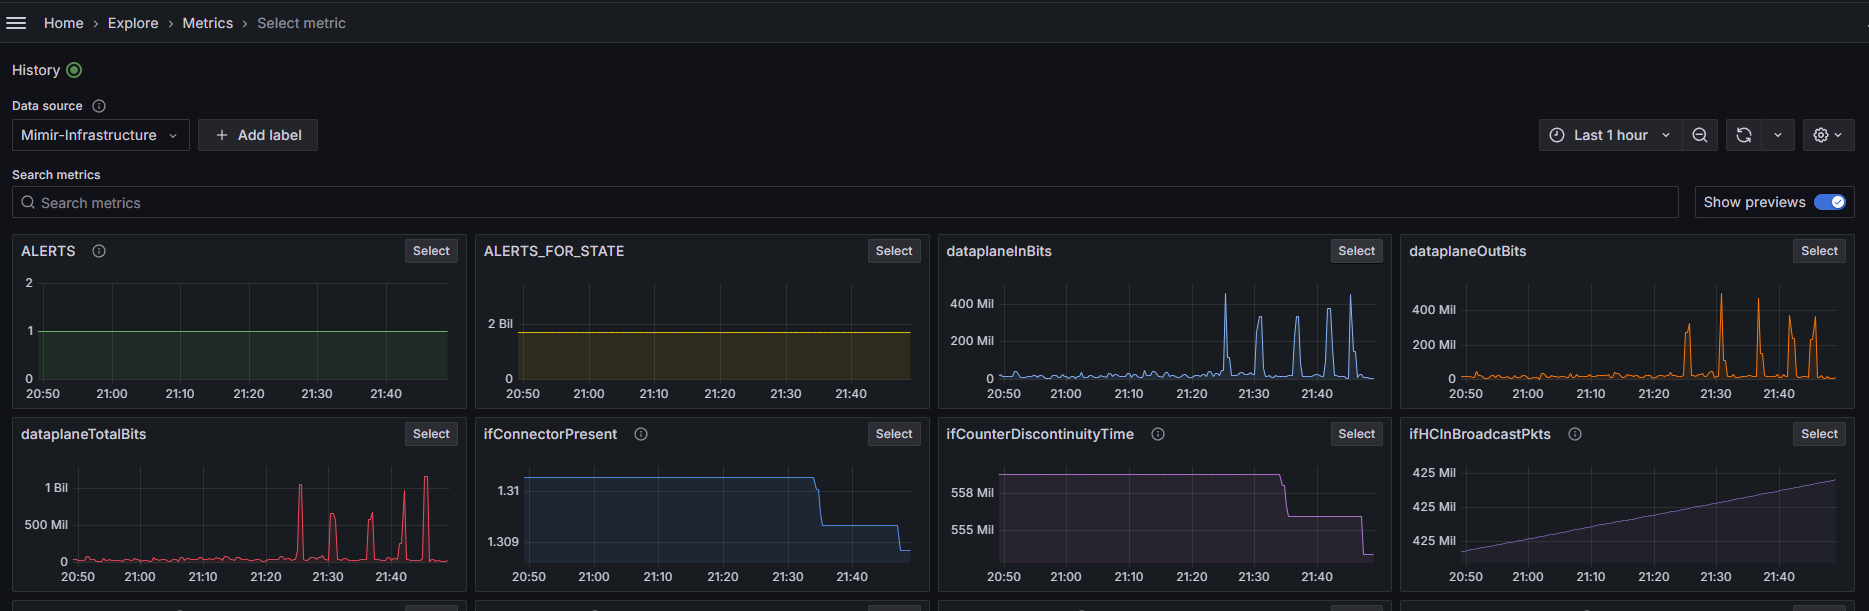

We are now presented with a view with an average graph of the choosen metric and 3 sub-tabs - **Overview**, **Breakdown** and **Related Metrics**

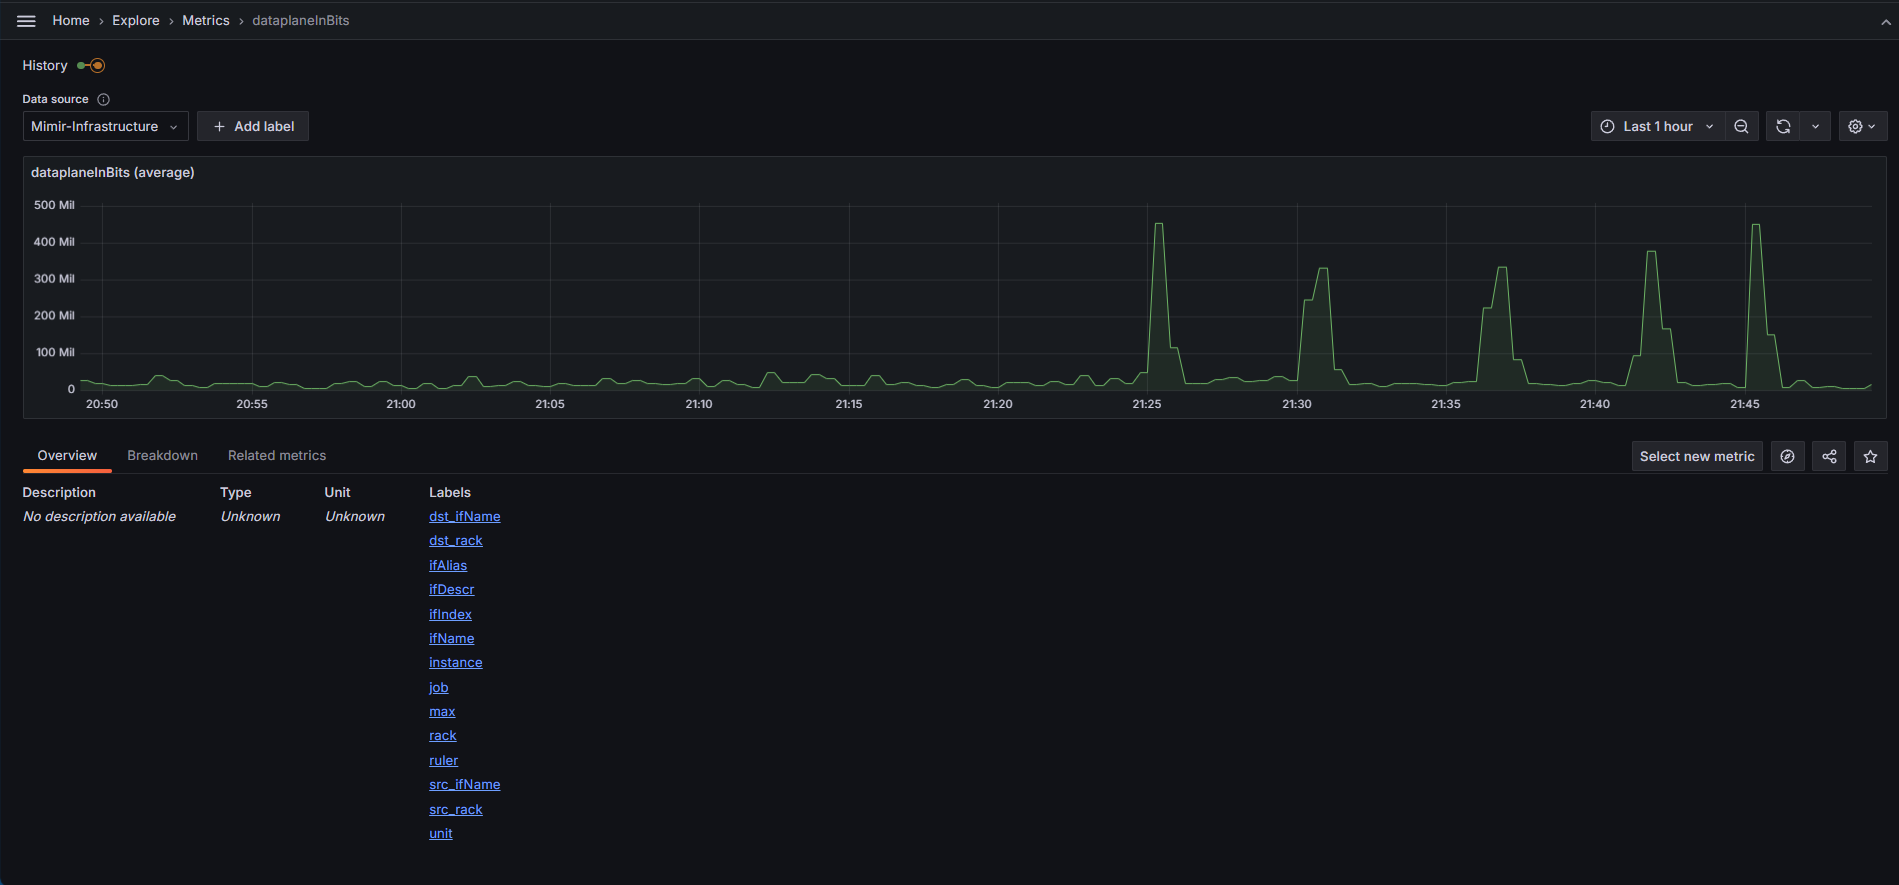


**Breakdown** Shows all the labels for the choosen metric. Hovering over a label graph will show a list of all the lable values are possible. 

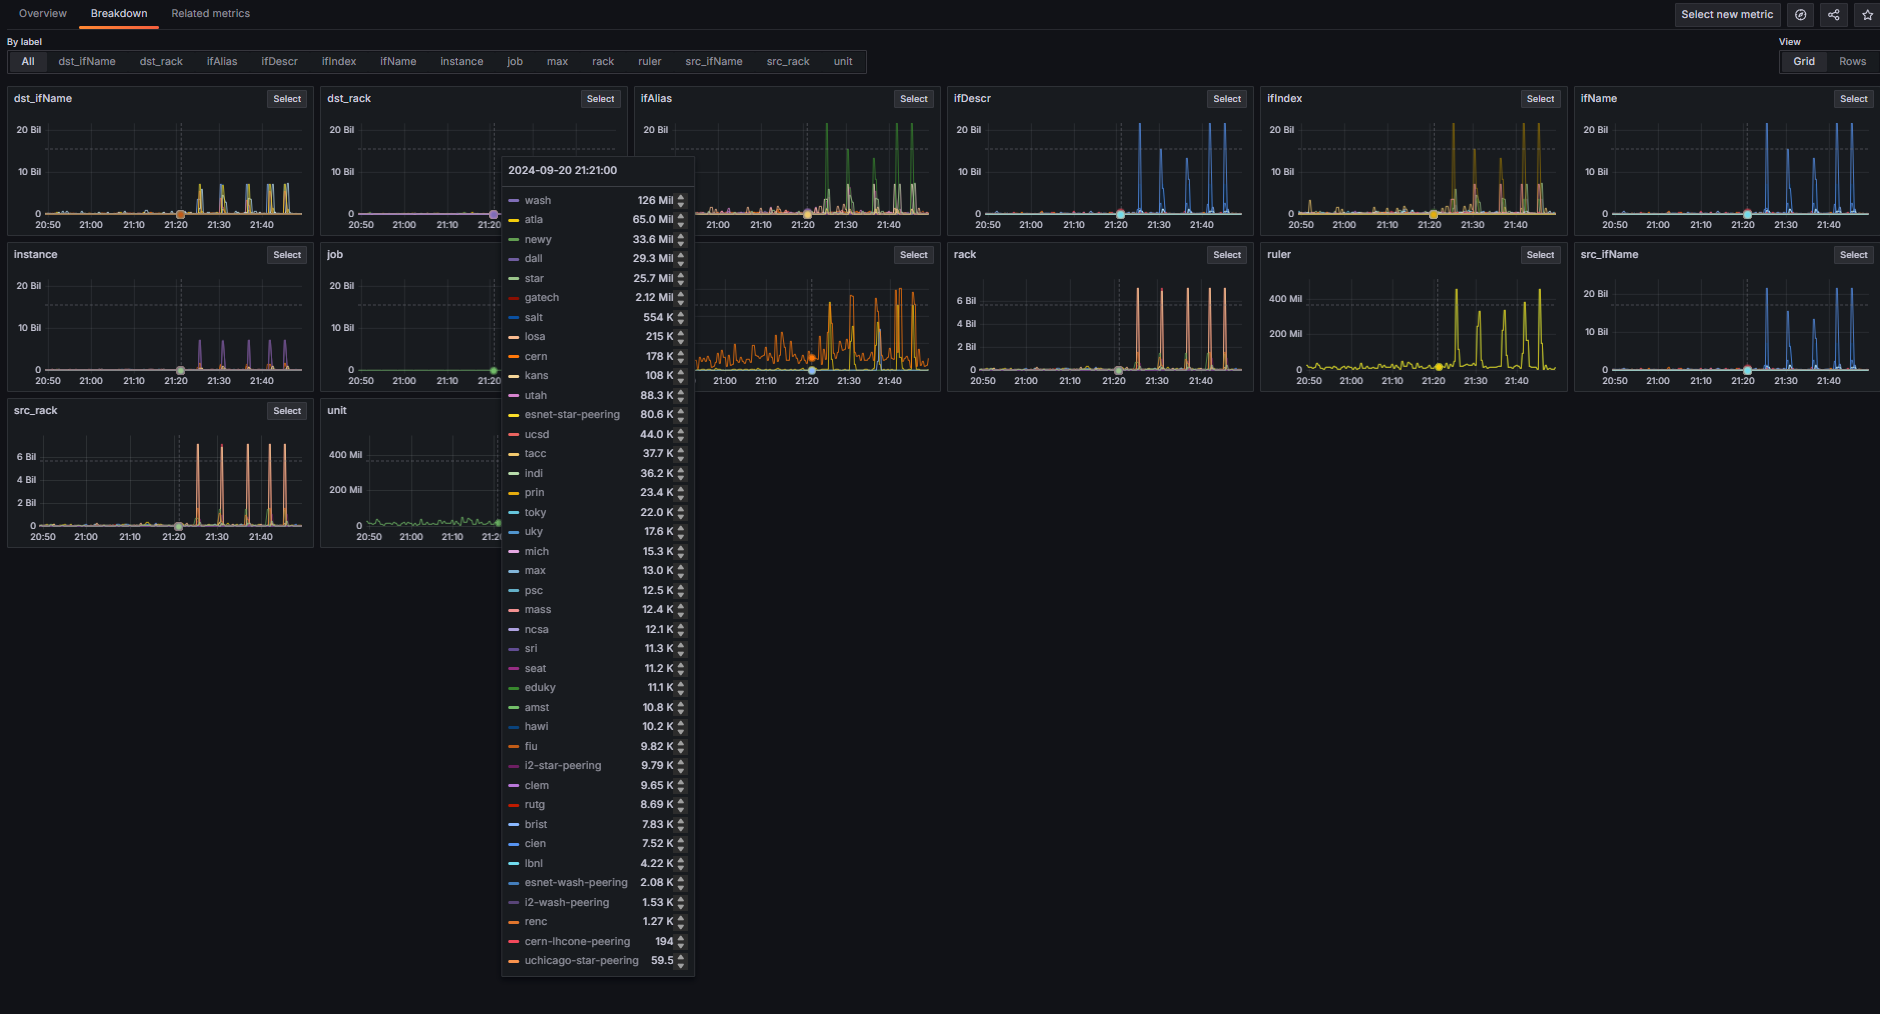

Click **Select** in the upper right corner of a label graph to see a graph for all of the possible labels. In this case, dst_rack. We can see that ncsa appears to have more traffic than other destination racks. We could click on **Add to filters** on the ncsa graph to add a filter for dst_rack=ncsa.

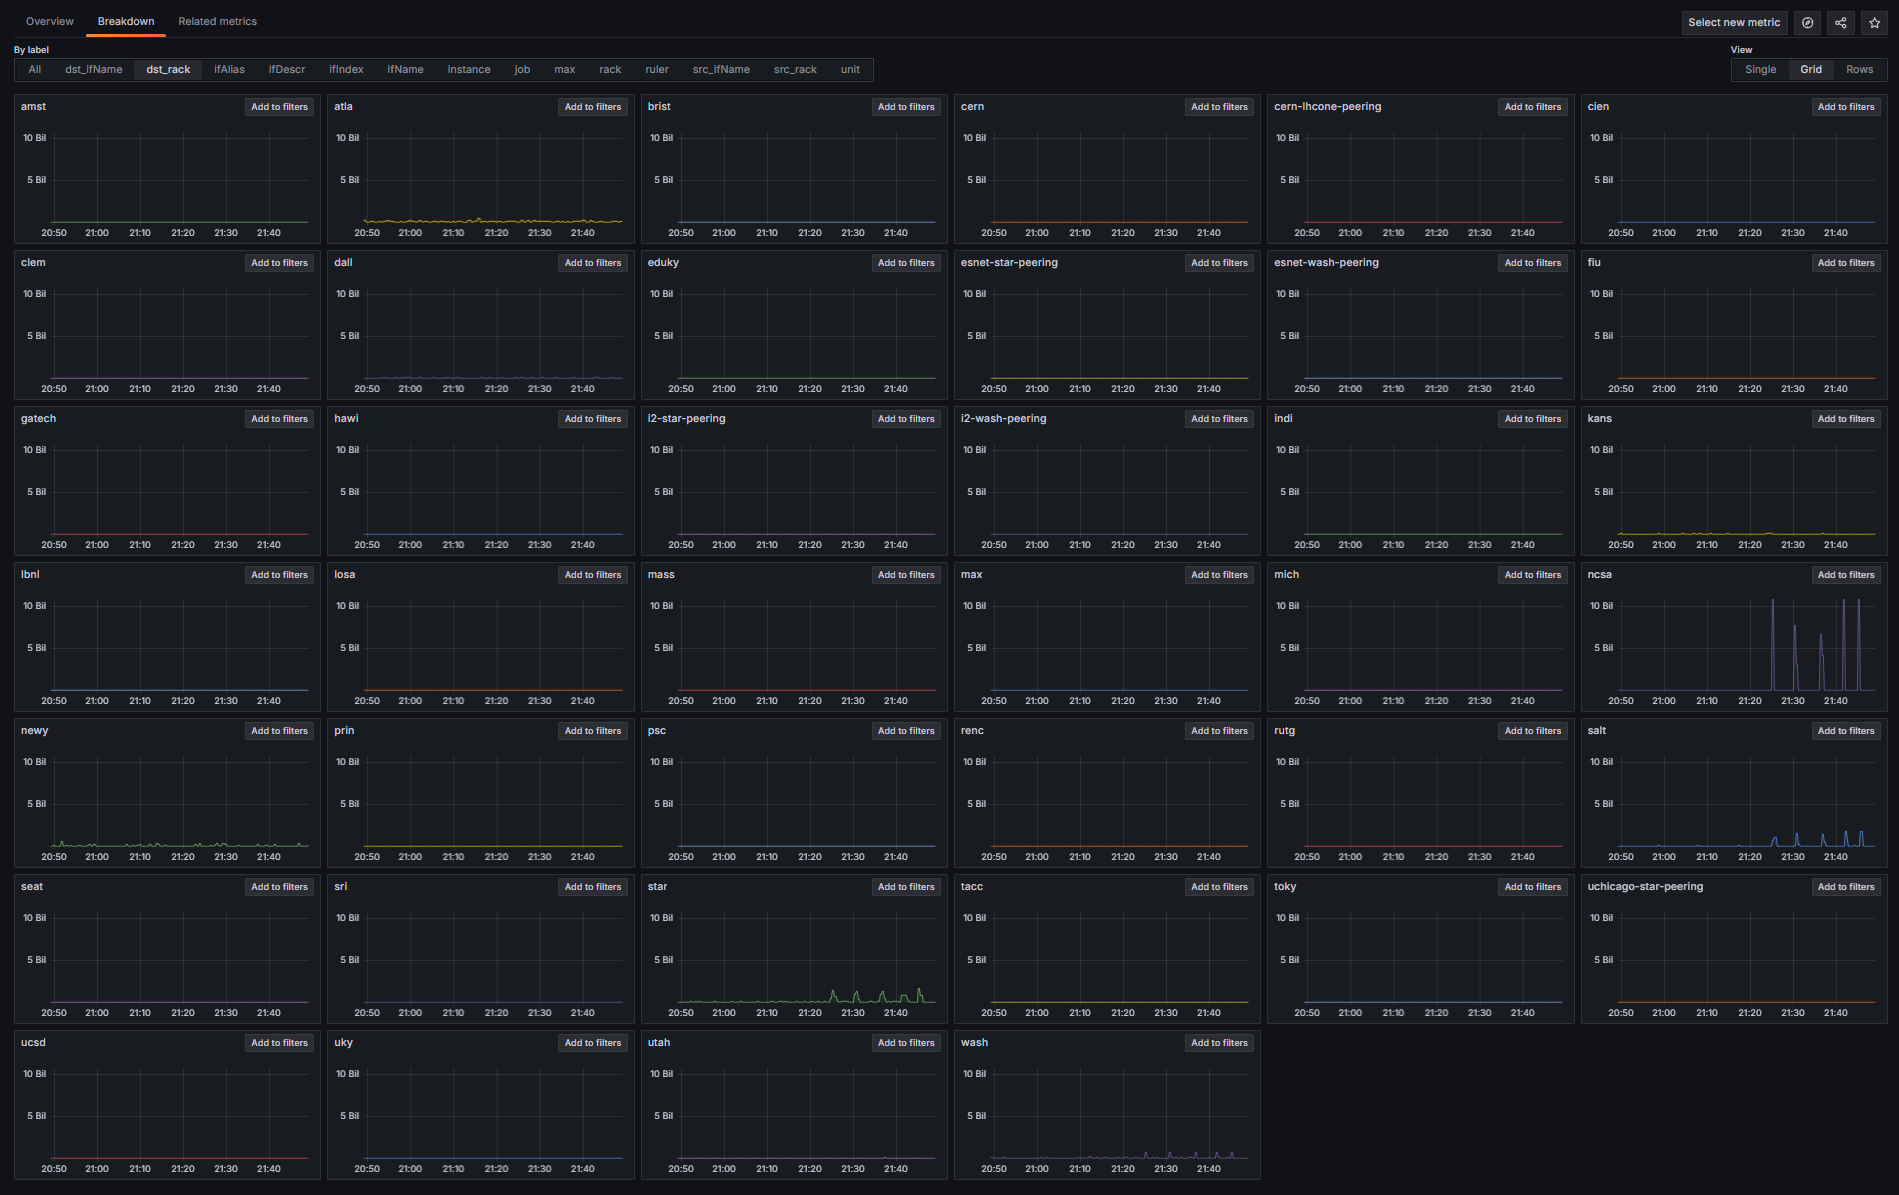

**Related Metrics** Shows metrics that may be similar or usefull in relation to the selected metrics.

In this case the dataplaneInBits is actually created using the ifHCInOctets. The "if" metrics are interface metrics.

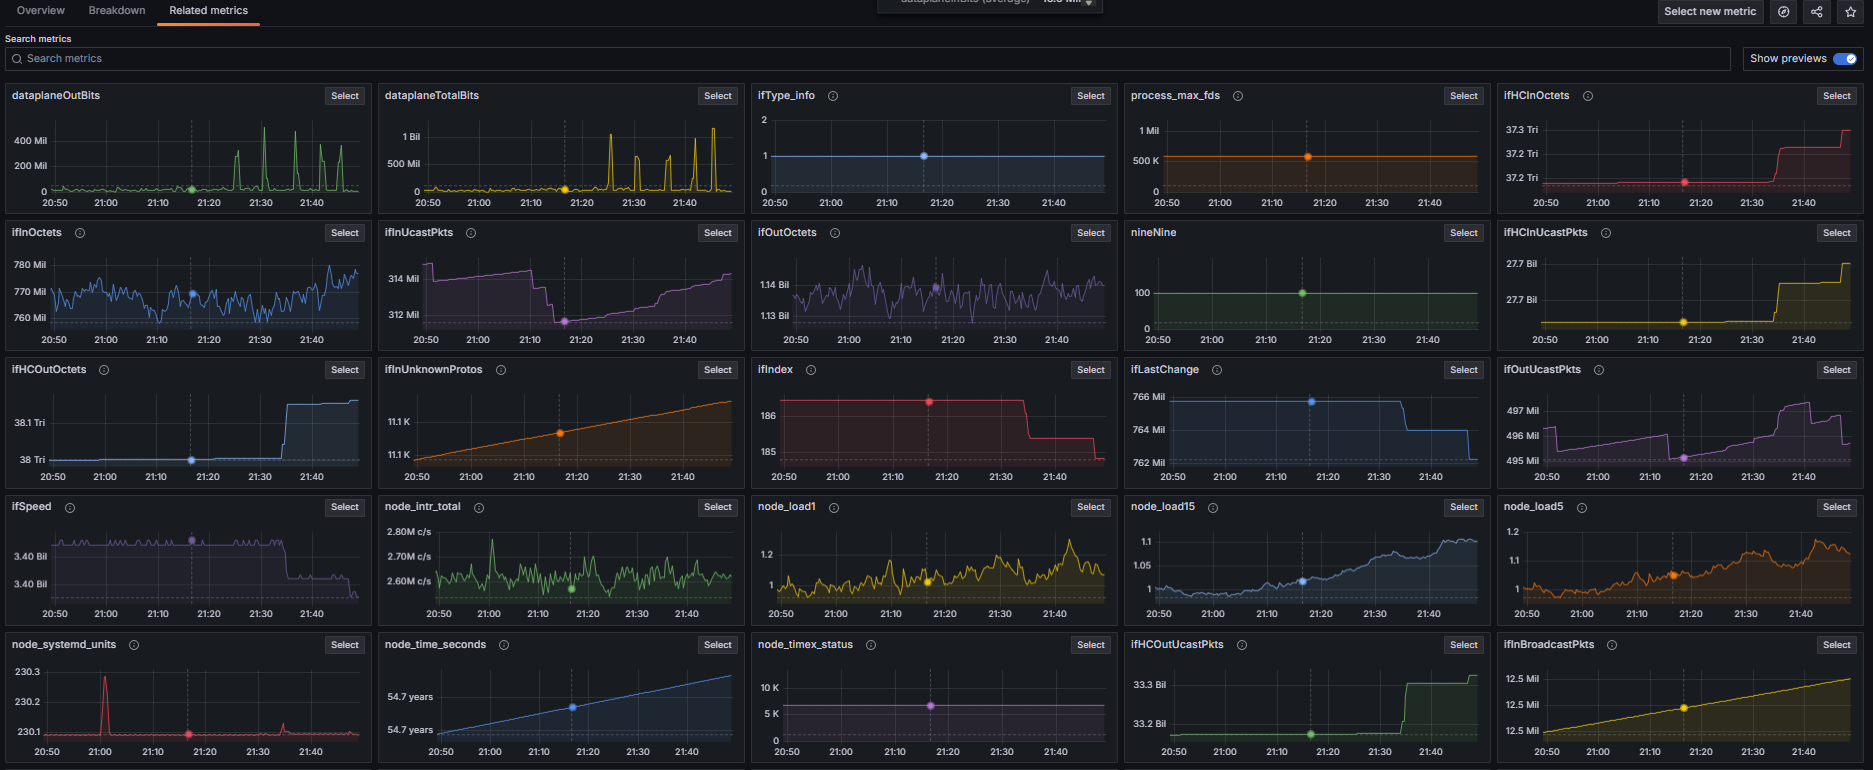

Typing "if" into the **Search metrics** bar will reveal more interface metrics.

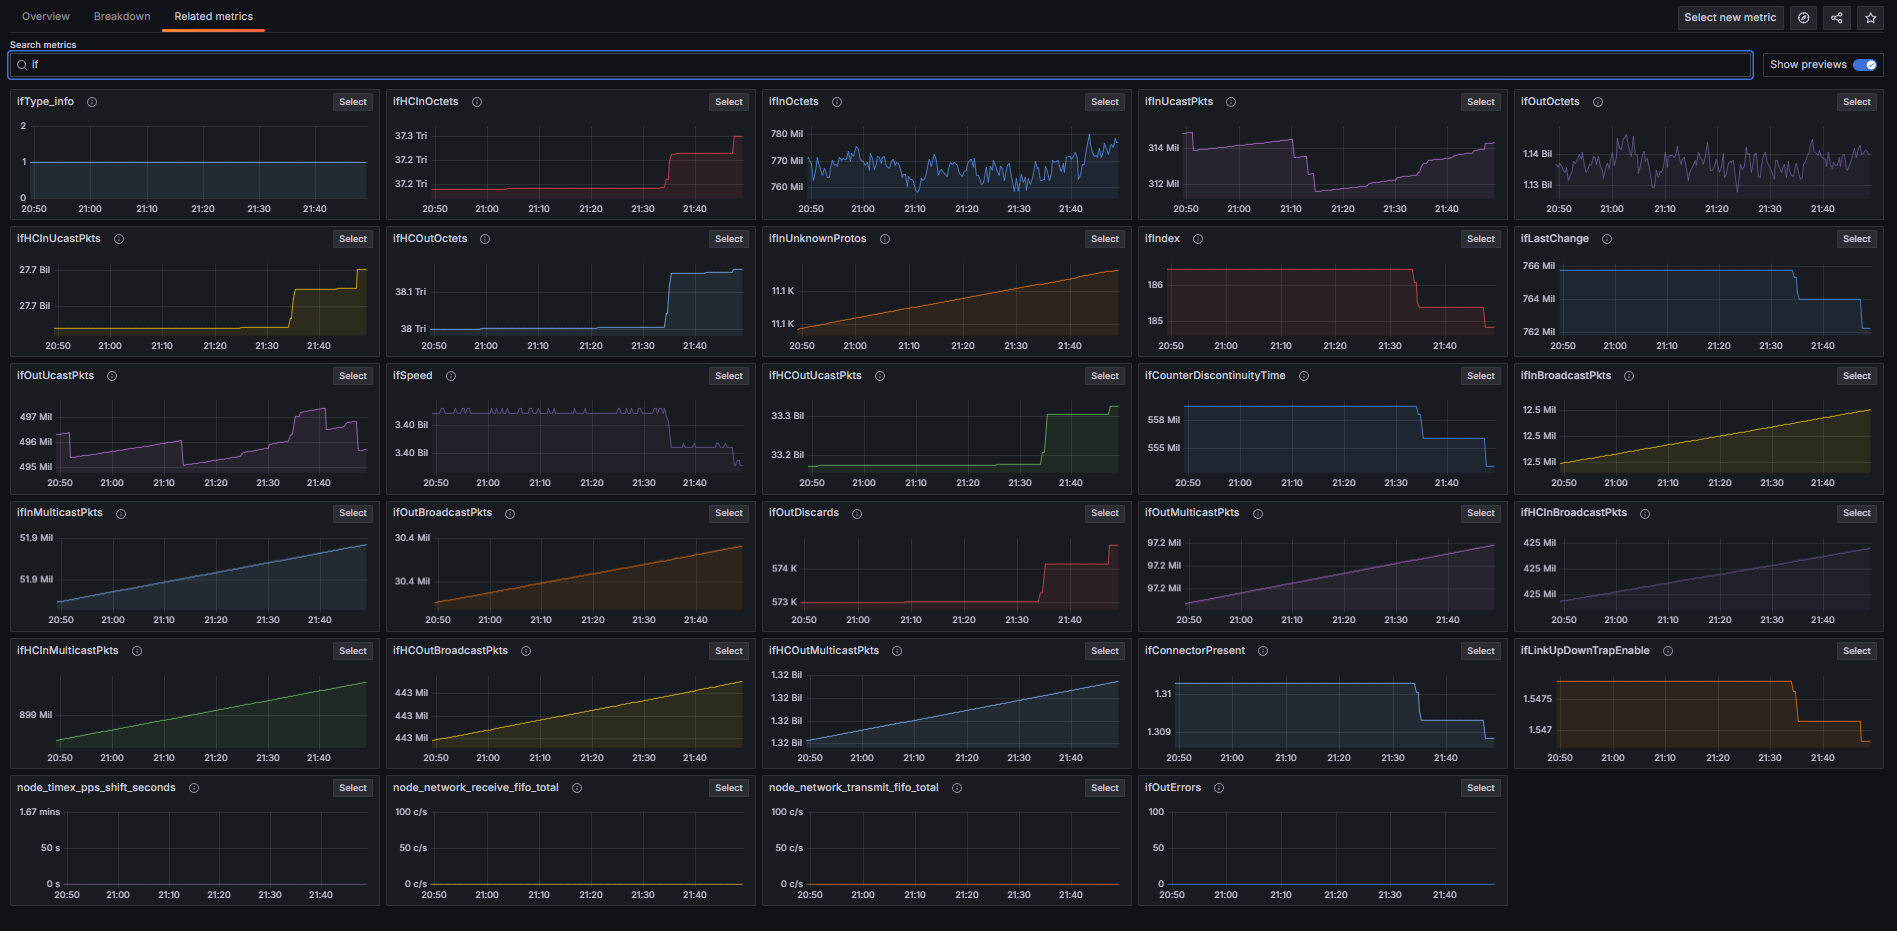

Hovering over the information  icon will show information about the metrics. In this case, a description of the metrics along with the MIB OID that was used to obtain these metric values via SNMP.

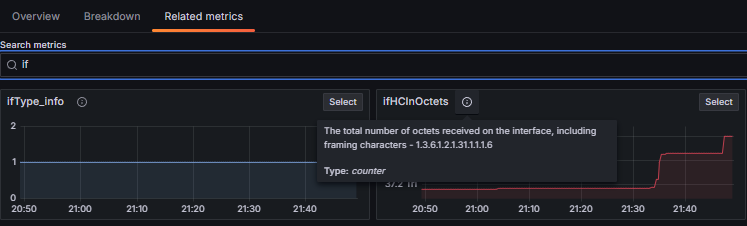

In [ ]:
# Link with the Highest Current Traffic
# Instant Query using query string
query_string = 'topk( 1, dataplaneInBits {ruler="central"})'
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
data = {'query': query_string }

response = requests.post(url, headers=headers, params=data)
print(response.content)
    
response.json()["data"]["result"][0] 
json_response = response.json()
metric = json_response["data"]["result"][0]["metric"]
value = json_response["data"]["result"][0]["value"]
Mbits = float(value[1])/1000000

print (f'The link from {metric["src_rack"]} to {metric["dst_rack"]} currently has the most traffic with {Mbits} Mega bits per second.')

In [ ]:
# Links with the Highest Current Traffic
# Instant Query using query string
most_count = "3"
query_string = 'topk(' + most_count + ', dataplaneInBits {ruler="central"})'
url =  "https://infrastructure-metrics.fabric-testbed.net/query"
headers = { 'Authorization': f'fabric-token {id_token}'}
data = {'query': query_string }

response = requests.post(url, headers=headers, params=data)
print(response.content)

json_response = response.json()
print(f"The top {most_count} links with the most traffic.")
for r in json_response["data"]["result"]:
    metric = r["metric"]
    value = r["value"][1]
    Mbits = float(value)/1000000
    info = f'The link from {metric["src_rack"]} to {metric["dst_rack"]} currently has traffic with {Mbits} Mega bits per second.'
    print(info)

